## Texi Guru Kaggle Challange

### important imports and data extraction

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

### Importing data

In [398]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()

running on local machine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amoun

null vales detection 

In [399]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

**Creating copies of test data and train data**

In [400]:
train_pd = copy_train_pd.copy()
# TODO: will check and can be done after applying preprocessing
# y = train_pd['total_amount']
# X = train_pd.drop('total_amount', axis= 1)
# list_of_features = list()

In [401]:
x_train, x_test = train_test_split(train_pd, test_size= 0.1)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

### Preprocessing section
* Selection of important features
* transformation of features
* features plotting
* correlation detection among features
* apply pca for dimensionality reduction



In [402]:
print('Null values in the given training data set is:')
x_train.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5507
trip_distance               0
RatecodeID               5507
store_and_fwd_flag       5507
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     5507
Airport_fee              5507
dtype: int64

In [403]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [ 1.  2.  3.  5.  0.  4. nan  6.  8.  9.]

unique values of RateCodeId is: [ 1.  2.  5.  3. 99. nan  4.]

unique values of store_and_fwd_flag is: ['N' 'Y' nan]

unique values of congestion_surcharge is: [ 2.5  0.   nan -2.5]

unqiue values of airport_fees is: [ 0.    1.75 -1.75   nan]




**According to my observations vendorId is also an categorical vairable and ratecodeid also becuase these items are ids which are represented as numbers**

In [404]:
print(f''' 
unique values for vendorId is: {x_train['VendorID'].unique()}\n
unique values for RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique valuse for PULocationID is: {x_train['PULocationID'].unique()}\n
unique valuse for DoLocationID is: {x_train['DOLocationID'].unique()}\n
''')

 
unique values for vendorId is: [1 0 2]

unique values for RateCodeId is: [ 1.  2.  5.  3. 99. nan  4.]

unique valuse for PULocationID is: [ 40 210  97  86   3 260 202 194 127 228 145  50  69 182 137  32 236 131
 146 184  73 163  82  48  38  25  78  93 180 159 124  34 177  67  89  84
  72 261 166 224  47 135  49 246  28 245  70  71 134 214 231 160 116 179
  65 263 107  44 175  22 239  75 109 123  18 153  59 142 208  45 101   1
 174 121  56 225  15 149 237 226 262 218 176 118 251  94 187   6 257 190
 256 183 161 220 222 244 155 248 128 243 232  41 168  12 197  14  79  98
 211 144 106 230  13 252  83 108  64   8  74  46  39   7 227  92 185 204
  35 169  62  21  80  20 152  60 151 249 103 120 253  17 219 102 201 198
 170 114 112  57  51 192  81 206 212 100  16 117 110 195 186 193 150  33
  61  85 255 138   2 156  76  43 207 191  55 215 171  99  10  27  53 205
 113 172 181 188 199 247 165   4 235 130 250 258 259  91 104 143 111  96
 173  63 234  77  26  54 217 229 122  30  90 196  58  24

In [405]:
x_train.describe() #* Description of complete data elements

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,157500.000000,151993.000000,157500.000000,151993.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,151993.000000,151993.000000
mean,0.728044,1.357359,5.308514,1.521919,132.771613,132.572616,1.936412,6.122624,0.649333,0.979532,29.635355,2.245811,0.158900
std,0.445838,0.890934,416.332661,6.543262,76.117326,76.211950,1.950759,4.622643,2.338633,0.199440,25.429725,0.821473,0.511836
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.466650,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,132.000000,1.000000,5.283076,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.498650,0.000000,1.000000,31.850000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


### Plot chart preparation
plots different types of plots for batter insight

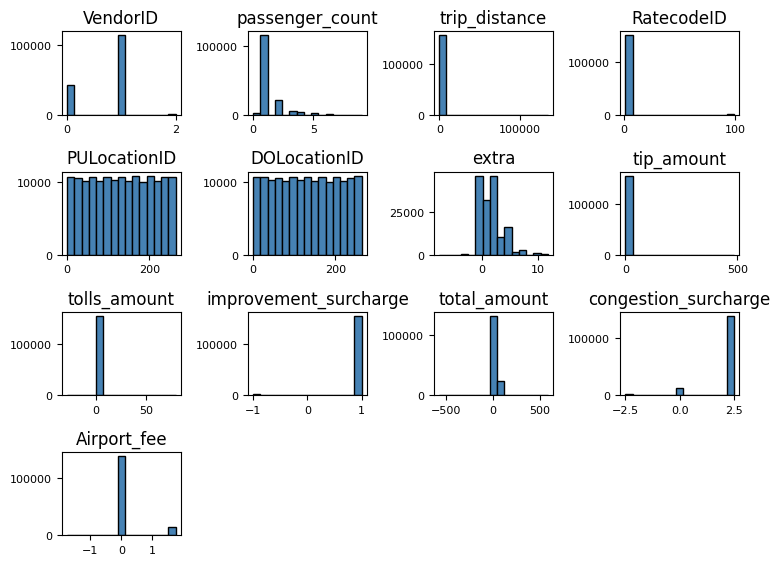

In [406]:
x_train.hist(bins= 15, color= 'steelblue', edgecolor='black', linewidth= 1.0,
             xlabelsize= 8, ylabelsize= 8, grid= False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### plotting pair waise plot for corelation detection

In [407]:
# sns.pairplot(X) ## Do not run this cell again
#* please prefer pairplot.png for details

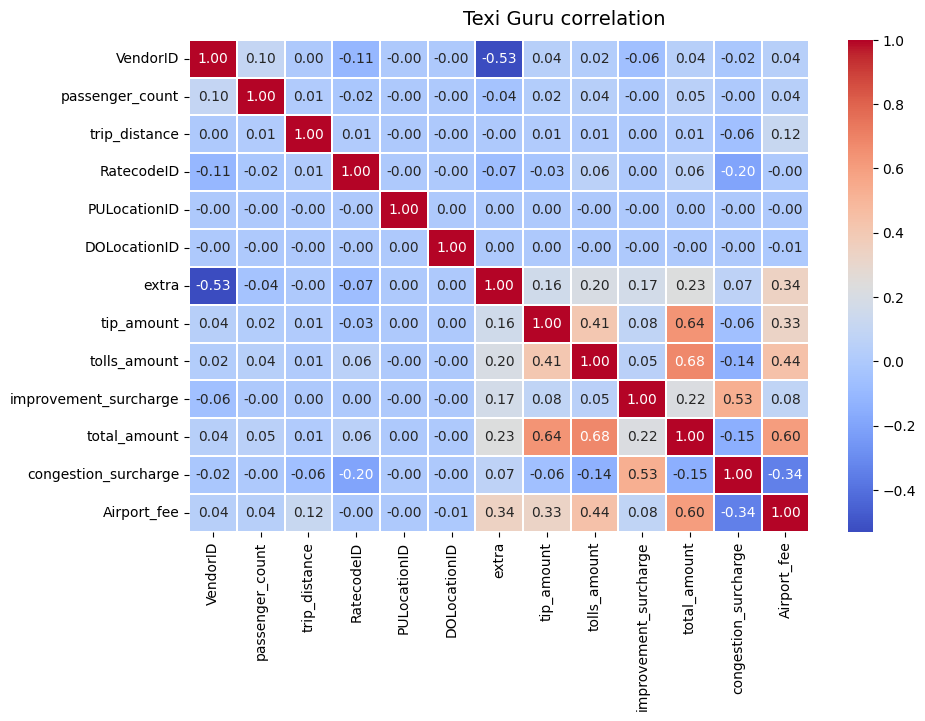

In [408]:
f, ax = plt.subplots(figsize=(10,6))
corr = x_train.corr(numeric_only= True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax=ax, cmap='coolwarm',
                       fmt='.2f', linewidths=0.05)
f.subplots_adjust(top= 0.93)
t = f.suptitle('Texi Guru correlation', fontsize= 14)


#### Converting datetime into datetime object

In [409]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [410]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()

convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()
x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 157500 entries, 120020 to 141980
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     157500 non-null  int64  
 1   passenger_count              151993 non-null  float64
 2   trip_distance                157500 non-null  float64
 3   RatecodeID                   151993 non-null  float64
 4   store_and_fwd_flag           151993 non-null  object 
 5   PULocationID                 157500 non-null  int64  
 6   DOLocationID                 157500 non-null  int64  
 7   payment_type                 157500 non-null  object 
 8   extra                        157500 non-null  float64
 9   tip_amount                   157500 non-null  float64
 10  tolls_amount                 157500 non-null  float64
 11  improvement_surcharge        157500 non-null  float64
 12  total_amount                 157500 non-null  float64
 13 

In [411]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157500.000000,151993.000000,157500.000000,151993.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,...,151993.000000,151993.000000,157500.0,157500.000000,157500.000000,157500.000000,157500.0,157500.000000,157500.000000,157500.000000
mean,0.728044,1.357359,5.308514,1.521919,132.771613,132.572616,1.936412,6.122624,0.649333,0.979532,...,2.245811,0.158900,2023.0,6.004241,29.062051,15.124756,2023.0,6.007759,28.969448,15.112381
std,0.445838,0.890934,416.332661,6.543262,76.117326,76.211950,1.950759,4.622643,2.338633,0.199440,...,0.821473,0.511836,0.0,0.064987,1.973852,5.768373,0.0,0.087742,2.579494,5.946603
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.466650,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,12.000000,2023.0,6.000000,29.000000,12.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,132.000000,1.000000,5.283076,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.498650,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


### trying to remove outliers form the dataset

In [412]:
x_train = x_train_copy.copy() # reseting dataset
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))
train_pd_filtered_toll_amt = x_train[(x_train.tolls_amount >= 0)]

print('len of wallet user', len(train_pd_filtered_toll_amt[train_pd_filtered_toll_amt.payment_type == 'Wallet']))
train_pd_filtered_extra = train_pd_filtered_toll_amt[(train_pd_filtered_toll_amt.extra >= 0)]

print('len of wallet user', len(train_pd_filtered_extra[train_pd_filtered_extra.payment_type == 'Wallet']))
# train_pd_filtered_airport_fee = train_pd_filtered_extra.copy() # TODO: need to check for batter solution 
print('airport unique values before filter', train_pd_filtered_extra.Airport_fee.unique())
print('total number of nan valuse in airport fees', train_pd_filtered_extra.Airport_fee.isna().sum())


train_pd_filtered_airport_fee =  train_pd_filtered_extra[(train_pd_filtered_extra.Airport_fee != -1.75)]


print('airport unique values after filter', train_pd_filtered_airport_fee.Airport_fee.unique())
print('len of wallet user', len(train_pd_filtered_airport_fee[train_pd_filtered_airport_fee.payment_type == 'Wallet']))
## same assumption with negative congestion surcharge and improvement surcharge
train_pd_filtered_improvement_surcharge = train_pd_filtered_airport_fee[(train_pd_filtered_airport_fee.improvement_surcharge >= 0)]


print('len of wallet user', len(train_pd_filtered_improvement_surcharge[train_pd_filtered_improvement_surcharge.payment_type == 'Wallet']))
print('congestion surcharge unique', train_pd_filtered_improvement_surcharge['congestion_surcharge'].unique())


train_pd_filtered_congestion_surcharge = train_pd_filtered_improvement_surcharge.copy() #TODO: need to check batter solution
# train_pd_filtered_congestion_surcharge = train

print('len of wallet user', len(train_pd_filtered_congestion_surcharge[train_pd_filtered_congestion_surcharge.payment_type == 'Wallet']))

x_train = train_pd_filtered_congestion_surcharge.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())

x_train.info()
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))


len of wallet user 5507
len of wallet user 5507
len of wallet user 5507
airport unique values before filter [ 0.    1.75   nan -1.75]
total number of nan valuse in airport fees 5507
airport unique values after filter [0.   1.75  nan]
len of wallet user 5507
len of wallet user 5507
congestion surcharge unique [2.5 0.  nan]
len of wallet user 5507
vendor ids after outlier removal [1 0 2]
<class 'pandas.core.frame.DataFrame'>
Index: 155938 entries, 120020 to 141980
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     155938 non-null  int64  
 1   passenger_count              150431 non-null  float64
 2   trip_distance                155938 non-null  float64
 3   RatecodeID                   150431 non-null  float64
 4   store_and_fwd_flag           150431 non-null  object 
 5   PULocationID                 155938 non-null  int64  
 6   DOLocationID           

In [413]:
### removing distance outliers
print(len(x_train[x_train.trip_distance > 100]))
x_train_distance_fitler = x_train[x_train.trip_distance <= 100]
x_train = x_train_distance_fitler.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))

7
vendor ids after outlier removal [1 0 2]
len of wallet user 5504


**X_train after applying basic filteration of the data**

In [414]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,155931.000000,150427.000000,155931.000000,150427.000000,155931.000000,155931.000000,155931.000000,155931.000000,155931.000000,155931.000000,...,150427.000000,150427.000000,155931.0,155931.000000,155931.000000,155931.000000,155931.0,155931.000000,155931.000000,155931.000000
mean,0.725314,1.356977,3.675617,1.525138,132.752820,132.547800,1.969683,6.157843,0.660830,0.999361,...,2.290197,0.163172,2023.0,6.004233,29.061643,15.128191,2023.0,6.007747,28.969140,15.116500
std,0.447233,0.891848,4.838499,6.576766,76.111577,76.184676,1.925705,4.628565,2.337412,0.023019,...,0.693176,0.508850,0.0,0.064921,1.972149,5.763828,0.0,0.087676,2.577718,5.942243
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000275,0.000000,0.000000,...,0.000000,0.000000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.090000,1.000000,67.000000,67.000000,0.000000,3.500620,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,12.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,132.000000,2.500000,5.325144,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,198.000000,2.500000,7.528163,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,84.160000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


#### Basic outlier removal completed 


### Creating pipeline for linear regression and SGD Regression
* create pipelines for features scaling
* create shufflesplit for cross validation

In [415]:
cv_shuffle_20 = ShuffleSplit(n_splits= 20, test_size= 0.2)
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.2)

In [416]:
x_train_filtered_copy = x_train.copy()

In [417]:
x_train = x_train_filtered_copy.copy()
x_test = x_test_copy.copy()
y_train = x_train['total_amount']
x_train = x_train.drop('total_amount', axis= 1)
y_test = x_test['total_amount']
x_test = x_test.drop('total_amount', axis= 1)

### dividing train set into com_train_set and dev_train_set


In [418]:
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(x_train, y_train, test_size= 0.2)

#### Creating pipelines for features scaling

In [419]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder())
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1)),
    #    ('one_hot_encoder', OneHotEncoder()) ## TODO: experimental changes
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder())
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [420]:
feature_scaline_pipeline = ColumnTransformer([
  # ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaline_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant'))]),
                                 ['RatecodeID']),
                                ('s_nd_f_flag',
                                 Pipel...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

### creating a linear regression model

In [421]:
col_trans = feature_scaline_pipeline.fit_transform(com_train_features)

print(col_trans.shape)
lin_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(com_train_features, com_train_labels)

(124744, 27)


Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant'))]),
                                                  [...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('lin_reg', LinearRegression())])

In [422]:
cols_name = feature_scaline_pipeline.get_feature_names_out()
len(cols_name)

27

In [423]:
col_trans_pd = pd.DataFrame(col_trans, columns= cols_name)
pca = PCA(svd_solver= 'full', n_components= 20).fit(col_trans_pd)
pca.singular_values_
# pca.n_components_
print(sum(pca.explained_variance_ratio_))
print(pca.components_)
pca.get_feature_names_out()



0.9997973581370482
[[-2.88118700e-03  9.90837526e-01  6.36237862e-05 -6.36237862e-05
   3.33952320e-05 -1.90164660e-04 -1.68110828e-03  1.93782997e-03
  -4.83775283e-05 -1.52787544e-04 -5.55566183e-05 -8.38907988e-03
   2.83465830e-03  2.01918925e-02 -4.34268934e-03 -3.52020279e-02
   9.31227201e-03  0.00000000e+00 -2.71479750e-04  1.72062315e-03
  -7.81639439e-03  0.00000000e+00  1.50004703e-04  1.00557934e-03
  -6.91437490e-03 -6.82602009e-03  1.27418949e-01]
 [ 1.08708420e-02 -1.30137423e-01  1.50986554e-04 -1.50986554e-04
   7.85456546e-05 -8.86153587e-04  2.48113723e-04 -2.56774591e-03
  -2.22288997e-04  2.60283755e-03 -6.09163605e-05  3.69404584e-02
   1.06546565e-01  1.32718089e-01 -1.50133335e-03 -5.80651304e-02
   1.30970516e-01 -0.00000000e+00  1.99158502e-03 -1.35059031e-03
  -4.50076968e-03 -0.00000000e+00  8.04837458e-03 -6.80740494e-03
  -7.71553139e-03  5.89407059e-03  9.65319830e-01]
 [ 6.20706050e-03  7.44588284e-04  1.39060049e-04 -1.39060049e-04
   5.23153070e-03  2.

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19'], dtype=object)

In [424]:
lin_reg_pipeline.score(com_train_features, com_train_labels)

0.8843582135441328

In [425]:
from sklearn.metrics import r2_score

r2_score(com_train_labels, lin_reg_pipeline.predict(com_train_features))

0.8843582135441328

In [426]:
print(lin_reg_pipeline.score(dev_test_features, dev_test_labels))
r2_score(dev_test_labels, lin_reg_pipeline.predict(dev_test_features))

0.8780899999242114


0.8780899999242114

In [427]:
print(lin_reg_pipeline.score(x_test, y_test))
r2_score(y_test, lin_reg_pipeline.predict(x_test))

0.806170085404712


0.806170085404712

In [428]:
lin_reg_pipeline[:-1].get_feature_names_out(input_features= com_train_features.columns)

array(['passanger_count__passenger_count', 'rate_code_id__RatecodeID',
       's_nd_f_flag__store_and_fwd_flag_N',
       's_nd_f_flag__store_and_fwd_flag_Y', 'pu_loc__PULocationID',
       'du_loc__DOLocationID', 'payment_t__payment_type_Cash',
       'payment_t__payment_type_Credit Card',
       'payment_t__payment_type_UPI', 'payment_t__payment_type_Wallet',
       'payment_t__payment_type_unknown', 'extra_t__extra',
       'tip_amount_t__tip_amount', 'tolls_amount_t__tolls_amount',
       'improvement_c__improvement_surcharge',
       'cong_charge__congestion_surcharge', 'Airport_fee_t__Airport_fee',
       'std_scaler__tpep_pickup_datetime_Year',
       'std_scaler__tpep_pickup_datetime_Month',
       'std_scaler__tpep_pickup_datetime_Day',
       'std_scaler__tpep_pickup_datetime_Hour',
       'std_scaler__tpep_dropoff_datetime_Year',
       'std_scaler__tpep_dropoff_datetime_Month',
       'std_scaler__tpep_dropoff_datetime_Day',
       'std_scaler__tpep_dropoff_datetime_Hour', 

In [430]:
from sklearn.feature_selection import RFE 

selector = RFE(lin_reg_pipeline, n_features_to_select= 10, step= 1)
print(type(com_train_features))
feature_scaline_pipeline.fit(com_train_features)
com_train_t = feature_scaline_pipeline.fit_transform(com_train_features)


print(type(com_train_t))
# selector = selector.fit(com_train_t, com_train_labels)
# print(selector.support_)

# print(selector.ranking_)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


#### Trying hyper parameters of linear regression

In [ ]:
# lin_reg_params = 

### searching best params using SGD Regressor

In [ ]:
sgd_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('pca', PCA()),
  ('sgd', SGDRegressor())
])
sgd_reg_pipeline

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant'))]),
                                                  [...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('pca', PCA()), ('sgd', SGDRegressor())])

In [ ]:
sgd_reg_pipeline.fit(com_train_features, com_train_labels)
print('score on com train labels',  sgd_reg_pipeline.score(com_train_features, com_train_labels))
print('scroe of dev train labels', sgd_reg_pipeline.score(dev_test_features, dev_test_labels))
print('score of test labels', sgd_reg_pipeline.score(x_test, y_test))


score on com train labels -4.2173857477957e+22
scroe of dev train labels -7.547372380038504e+22
score of test labels -4.182163349987263e+19


In [ ]:
r2_score(com_train_labels, sgd_reg_pipeline.predict(com_train_features))

-4.2173857477957e+22

### testing LASSO regression for basic test analysis

In [ ]:
lasso_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('pca', PCA()),
  ('lasso', Lasso())
])
# print(lasso_reg_pipeline)
lasso_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant'))]),
                                                  [...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('pca', PCA()), ('lasso', Lasso())])

In [ ]:
print('score on com train labels',  lasso_reg_pipeline.score(com_train_features, com_train_labels))
print('scroe of dev train labels', lasso_reg_pipeline.score(dev_test_features, dev_test_labels))
print('score of test labels', lasso_reg_pipeline.score(x_test, y_test))

score on com train labels 0.7016383129625391
scroe of dev train labels 0.6892604771011503
score of test labels 0.6586215516006932


### testing ridge regression

In [ ]:
ridge_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('pca', PCA()),
  ('ridge', Ridge())
])
ridge_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant'))]),
                                                  [...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('pca', PCA()), ('ridge', Ridge())])

In [ ]:
print('score on com train labels',  ridge_reg_pipeline.score(com_train_features, com_train_labels))
print('scroe of dev train labels', ridge_reg_pipeline.score(dev_test_features, dev_test_labels))
print('score of test labels', ridge_reg_pipeline.score(x_test, y_test))

score on com train labels 0.7245795508983243
scroe of dev train labels 0.7129216220591372
score of test labels 0.6067817186335454


## transforming test

In [ ]:
# x_test_t = lin_reg_pipeline.transform(x_test)
print(x_train.VendorID.unique())
print(x_test.VendorID.unique())

# x_test_t = feature_scaline_pipeline.transform(x_test)
lin_reg_pipeline.score(x_test, y_test)

[0 1 2]
[1 0 2]


0.6067816335609331

### Submission code starting from here

In [ ]:
copy_test_pd.copy()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [ ]:
test_pd_t = copy_test_pd.copy()
convert_dt_obj_to_datetime(test_pd_t, 'tpep_pickup_datetime')
test_pd_t = test_pd_t.drop('tpep_pickup_datetime', axis= 1)
test_pd_t.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VendorID                    50000 non-null  int64  
 1   tpep_dropoff_datetime       50000 non-null  object 
 2   passenger_count             48221 non-null  float64
 3   trip_distance               50000 non-null  float64
 4   RatecodeID                  48221 non-null  float64
 5   store_and_fwd_flag          48221 non-null  object 
 6   PULocationID                50000 non-null  int64  
 7   DOLocationID                50000 non-null  int64  
 8   payment_type                50000 non-null  object 
 9   extra                       50000 non-null  float64
 10  tip_amount                  50000 non-null  float64
 11  tolls_amount                50000 non-null  float64
 12  improvement_surcharge       50000 non-null  float64
 13  congestion_surcharge        482

In [ ]:
convert_dt_obj_to_datetime(test_pd_t, 'tpep_dropoff_datetime')
test_pd_t = test_pd_t.drop('tpep_dropoff_datetime', axis= 1)
test_pd_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VendorID                     50000 non-null  int64  
 1   passenger_count              48221 non-null  float64
 2   trip_distance                50000 non-null  float64
 3   RatecodeID                   48221 non-null  float64
 4   store_and_fwd_flag           48221 non-null  object 
 5   PULocationID                 50000 non-null  int64  
 6   DOLocationID                 50000 non-null  int64  
 7   payment_type                 50000 non-null  object 
 8   extra                        50000 non-null  float64
 9   tip_amount                   50000 non-null  float64
 10  tolls_amount                 50000 non-null  float64
 11  improvement_surcharge        50000 non-null  float64
 12  congestion_surcharge         48221 non-null  float64
 13  Airport_fee     

In [ ]:
test_pd_t.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,...,2.5,0.0,2023,6,29,0,2023,6,29,0
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,...,2.5,0.0,2023,6,30,17,2023,6,30,17
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,...,2.5,0.0,2023,6,29,18,2023,6,29,19
3,0,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,...,2.5,0.0,2023,6,30,21,2023,6,30,21
4,1,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,...,0.0,0.0,2023,6,29,14,2023,6,29,15


In [ ]:
prediction = lin_reg_pipeline.predict(test_pd_t)

In [ ]:
submission = pd.DataFrame(columns= ['ID', "total_amount"])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = lin_reg_pipeline.predict(test_pd_t)
submission.to_csv('submission.csv', index=False)

In [ ]:
submission[submission.total_amount > 1000]
submission.describe()

,ID,total_amount
count,50000.000000,50000.000000
mean,25000.500000,30.112030
std,14433.901067,20.408040
min,1.000000,-46.556658
25%,12500.750000,19.815143
50%,25000.500000,23.811742
75%,37500.250000,29.273381
max,50000.000000,311.525599
